In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

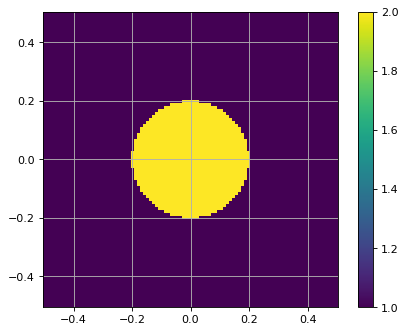

In [2]:
# Create test geometry
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
xx, yy = np.meshgrid(x,y)
C = (xx**2 + yy**2) <= 0.2**2
C = 1.0 + C * (1.0)

fig = plt.figure(dpi=80)
plt.pcolormesh(x, y, C)
plt.grid()
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

In [3]:
# Write to h5 using h5py
f = h5py.File("h5pytestfile.hdf5", "w")
dset = f.create_dataset("init", data=C)
f.close()

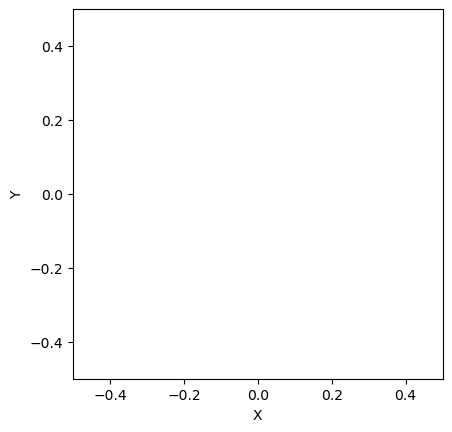

In [4]:
# Test with MEEP
import meep as mp

resolution = 64
cell_size = mp.Vector3(1,1,0)

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    epsilon_input_file="h5pytestfile.hdf5",
                   )
sim.plot2D()
plt.show()